In [3]:
!pip install pytrends

C:\Users\Rajhi Zaid\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Rajhi Zaid\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Rajhi Zaid\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Rajhi Zaid\anaconda3\Lib\sit

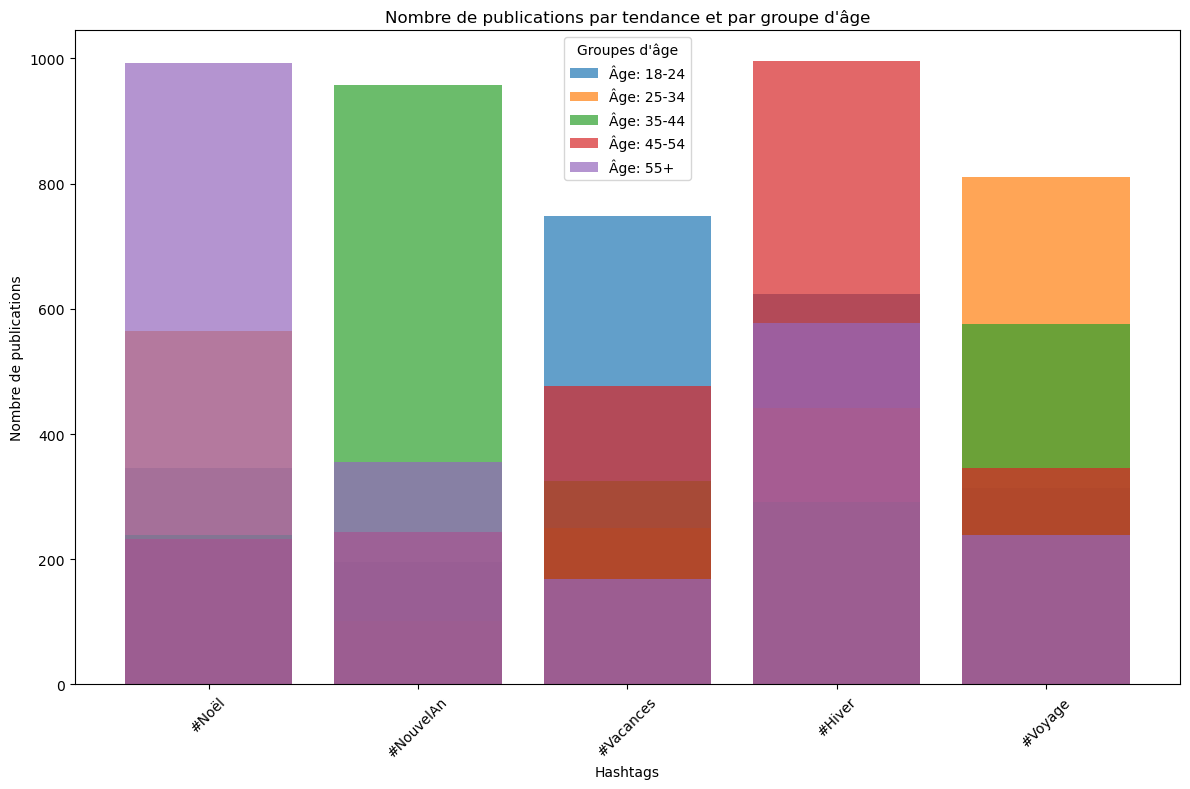

In [7]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Étape 1 : Initialisation de pytrends

pytrends = TrendReq(hl='fr-FR', tz=360, requests_args={'verify': False})

# Étape 2 : Définir les hashtags ou mots-clés à analyser
hashtags = ["#Noël", "#NouvelAn", "#Vacances", "#Hiver", "#Voyage"]

# Étape 3 : Rechercher les tendances
pytrends.build_payload(hashtags, timeframe='now 7-d', geo='FR', gprop='')

# Récupérer les données d'intérêt
data = pytrends.interest_over_time()

# Vérification des données
if not data.empty:
    data = data.drop(labels=['isPartial'], axis=1)  # Supprimer la colonne isPartial si présente

    # Étape 4 : Simuler les données d'âge (données fictives)
    age_groups = ["18-24", "25-34", "35-44", "45-54", "55+"]
    simulated_age_data = {}

    for hashtag in hashtags:
        simulated_age_data[hashtag] = {
            age: np.random.randint(100, 1000) for age in age_groups
        }

    # Convertir les données simulées en DataFrame
    age_data = pd.DataFrame(simulated_age_data).T
    age_data.index.name = "Hashtag"

    # Étape 5 : Visualisation des données par âge
    plt.figure(figsize=(12, 8))
    for age in age_groups:
        plt.bar(
            age_data.index,
            age_data[age],
            label=f"Âge: {age}",
            alpha=0.7,
        )

    plt.title("Nombre de publications par tendance et par groupe d'âge")
    plt.xlabel("Hashtags")
    plt.ylabel("Nombre de publications")
    plt.legend(title="Groupes d'âge")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Étape 6 : Exporter les données pour analyse
    age_data.to_csv("nombre_publications_par_age.csv", encoding="utf-8")
else:
    print("Aucune donnée disponible pour les hashtags spécifiés.")



Comparaison des tendances entre deux périodes :

           Moyenne Période 1 (Novembre)  Moyenne Période 2 (Décembre)  \
#Noël                          3.333333                      0.000000   
#NouvelAn                      0.000000                      0.000000   
#Vacances                      0.000000                      0.000000   
#Hiver                         0.000000                      3.225806   
#Voyage                        0.000000                      0.000000   

           Taux de Différence (%)  
#Noël                      -100.0  
#NouvelAn                     NaN  
#Vacances                     NaN  
#Hiver                        inf  
#Voyage                       NaN  


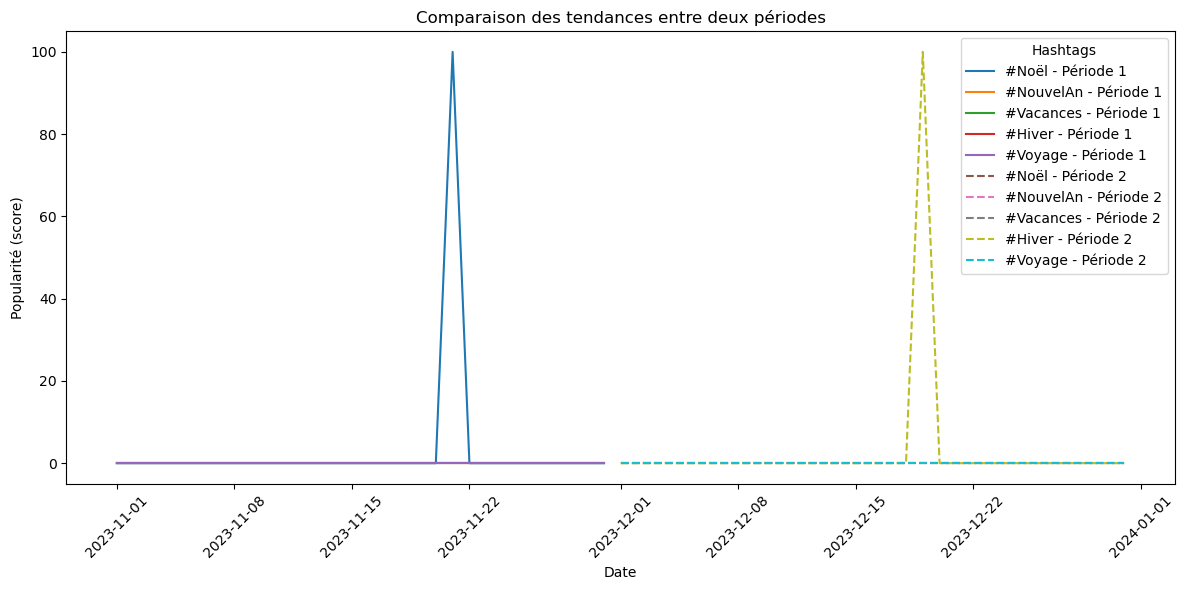

In [17]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import pandas as pd
import time

# Étape 1 : Initialisation de pytrends
pytrends = TrendReq(hl='fr-FR', tz=360)

# Étape 2 : Définir les hashtags ou mots-clés à analyser
hashtags = ["#Noël", "#NouvelAn", "#Vacances", "#Hiver", "#Voyage"]

# Étape 3 : Définir deux périodes pour comparaison
periode1 = '2023-11-01 2023-11-30'  # Exemple : novembre 2023
periode2 = '2023-12-01 2023-12-31'  # Exemple : décembre 2023


# Étape 4 : Rechercher les tendances pour les deux périodes avec délai
pytrends.build_payload(hashtags, timeframe=periode1, geo='FR', gprop='')
time.sleep(10)  # Pause de 10 secondes
data_periode1 = pytrends.interest_over_time()

pytrends.build_payload(hashtags, timeframe=periode2, geo='FR', gprop='')
time.sleep(10)  # Pause de 10 secondes
data_periode2 = pytrends.interest_over_time()
# Vérification des données
if not data_periode1.empty and not data_periode2.empty:
    # Suppression de la colonne 'isPartial'
    data_periode1 = data_periode1.drop(labels=['isPartial'], axis=1)
    data_periode2 = data_periode2.drop(labels=['isPartial'], axis=1)

    # Étape 5 : Calcul de la moyenne pour chaque période
    moyenne_periode1 = data_periode1.mean()
    moyenne_periode2 = data_periode2.mean()

    # Calcul du taux de différence entre les deux périodes
    taux_difference = ((moyenne_periode2 - moyenne_periode1) / moyenne_periode1) * 100

    # Résumé des résultats
    comparaison = pd.DataFrame({
        'Moyenne Période 1 (Novembre)': moyenne_periode1,
        'Moyenne Période 2 (Décembre)': moyenne_periode2,
        'Taux de Différence (%)': taux_difference
    })

    # Afficher les résultats
    print("\nComparaison des tendances entre deux périodes :\n")
    print(comparaison)

    # Étape 6 : Visualisation des tendances
    plt.figure(figsize=(12, 6))
    for column in data_periode1.columns:
        plt.plot(data_periode1.index, data_periode1[column], label=f"{column} - Période 1")
    for column in data_periode2.columns:
        plt.plot(data_periode2.index, data_periode2[column], linestyle='--', label=f"{column} - Période 2")

    plt.title("Comparaison des tendances entre deux périodes")
    plt.xlabel("Date")
    plt.ylabel("Popularité (score)")
    plt.legend(title="Hashtags")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Aucune donnée disponible pour les hashtags spécifiés.")
